In [ ]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv


In [6]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


In [7]:
train = pd.read_csv('/kaggle/input/playground-series-s5e6/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e6/sample_submission.csv')



In [8]:
test1=pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')

In [9]:
test1.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14


In [10]:
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [11]:
train['Soil Type'].unique()

array(['Clayey', 'Sandy', 'Red', 'Loamy', 'Black'], dtype=object)

In [12]:
train['Crop Type'].unique()

array(['Sugarcane', 'Millets', 'Barley', 'Paddy', 'Pulses', 'Tobacco',
       'Ground Nuts', 'Maize', 'Cotton', 'Wheat', 'Oil seeds'],
      dtype=object)

In [13]:
train['Fertilizer Name'].unique()

array(['28-28', '17-17-17', '10-26-26', 'DAP', '20-20', '14-35-14',
       'Urea'], dtype=object)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


In [15]:
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [16]:
from sklearn.preprocessing import LabelEncoder


cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])


In [17]:
cat_cols = test.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])

In [18]:
test

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,4,10,34,11,24
1,750001,27,62,45,3,8,30,14,15
2,750002,28,72,28,1,2,14,15,4
3,750003,37,53,57,0,2,18,17,36
4,750004,31,55,32,3,7,13,19,14
...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,3,8,14,7,18
249996,999996,33,62,55,3,7,28,14,7
249997,999997,36,53,64,0,6,28,11,27
249998,999998,36,67,26,1,6,33,0,10


In [19]:
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,1,8,36,4,5,4
1,1,27,69,65,4,4,30,6,18,4
2,2,29,63,32,4,4,24,12,16,2
3,3,35,62,54,4,0,39,12,4,0
4,4,35,58,43,3,6,37,2,16,5


In [20]:
sample_submission.head()

,id,Fertilizer Name
0,750000,14-35-14 10-26-26 Urea
1,750001,14-35-14 10-26-26 Urea
2,750002,14-35-14 10-26-26 Urea
3,750003,14-35-14 10-26-26 Urea
4,750004,14-35-14 10-26-26 Urea


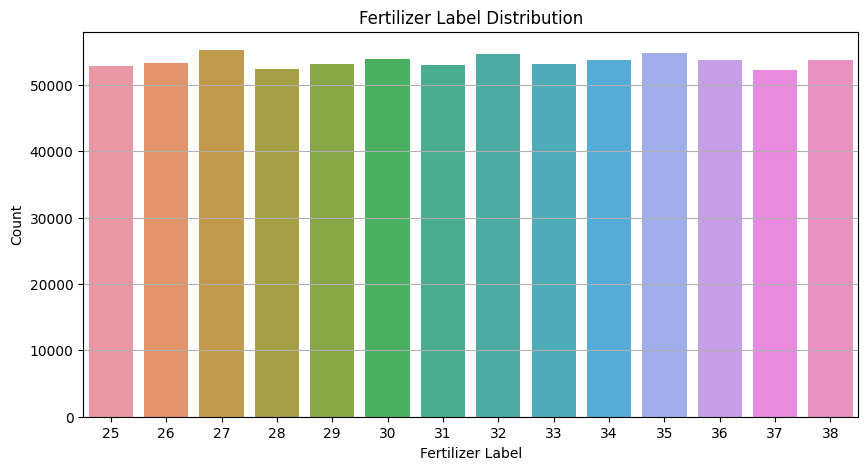

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Temparature')
plt.title('Fertilizer Label Distribution')
plt.xlabel('Fertilizer Label')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


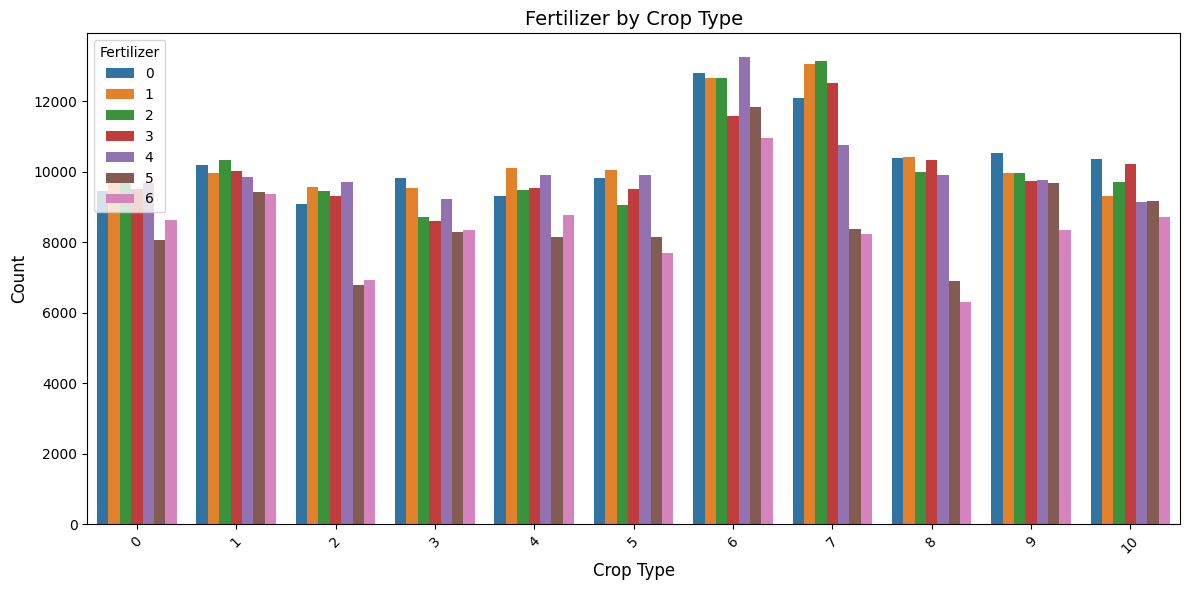

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Crop Type', hue='Fertilizer Name')
plt.title("Fertilizer by Crop Type", fontsize=14)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Fertilizer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

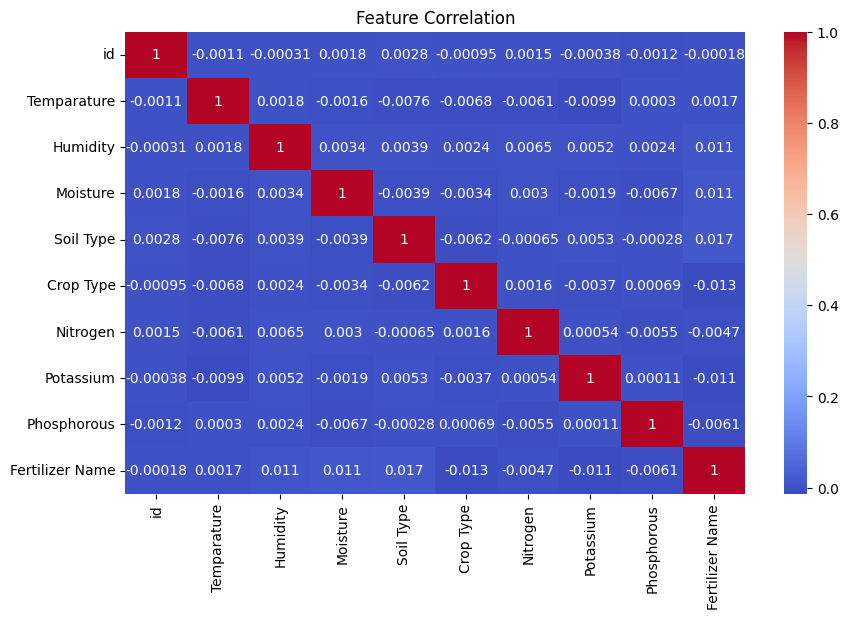

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [24]:
y=train['Fertilizer Name']

In [25]:
x=train.drop(['Fertilizer Name'],axis=1)

In [26]:
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [27]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
# models = {
#     "Lasso": Lasso(),
#     "Ridge": Ridge(),
#     "K-Neighbors Regressor": KNeighborsRegressor(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest Regressor": RandomForestRegressor()
# }

In [31]:
# scores = {}
# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     r2 = r2_score(y_test, y_pred)
#     scores[name] = r2
#     print(f"{name}: R2 Score = {r2:.4f}")


In [32]:
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.ensemble import RandomForestClassifier

# model = OneVsRestClassifier(RandomForestClassifier())
# model.fit(x_train, y_train)

In [33]:
# y_pred= model.predict(x_test)

In [34]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# print(confusion_matrix(y_test,y_pred))
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [35]:
# model.score(x_test,y_pred)

In [36]:
test.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,31,70,52,4,10,34,11,24
1,27,62,45,3,8,30,14,15
2,28,72,28,1,2,14,15,4
3,37,53,57,0,2,18,17,36
4,31,55,32,3,7,13,19,14


In [37]:
test['id']=test1['id'] 

In [38]:
ordered_columns = [
    'id', 'Temparature', 'Humidity', 'Moisture',
    'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous'
]

# Apply to test or train
test = test[ordered_columns]

In [ ]:
sample_submission

In [ ]:
top3_preds = np.argsort(probs1, axis=1)[:, -3:][:, ::-1]


In [ ]:
label_map = {
    0: '10-26-26',
    1: '14-35-14',
    2: '17-17-17',
    3: '20-20',
    4: '28-28',
    5: 'DAP',
    6: 'Urea',
    7: 'NPK',
    8: 'NPK 14-35-14',
    9: 'NPK 17-17-17'
}


In [ ]:
submission.head(10)

In [41]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(x_train, y_train)


KeyboardInterrupt: 

In [43]:
from sklearn.model_selection import GridSearchC


ImportError: cannot import name 'GridSearchC' from 'sklearn.model_selection' (/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/__init__.py)

In [42]:
# Parameter grid
param_grid = {
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'subsample': [0.7],
    'colsample_bytree': [0.7, 1.0]
}

# Grid Search
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(x_train, y_train)


# Best params and score
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

print('ok')



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.7}
Best Accuracy: 0.18589166666666668
ok


In [44]:

# Evaluate on validation set
best_model = grid.best_estimator_


In [45]:
# Predict class probabilities
probs_xgb1 = best_model.predict_proba(test)

# Get top 3 indices per row
top3_preds = np.argsort(probs_xgb1, axis=1)[:, -3:][:, ::-1]  # sorted descending


In [ ]:
# # Predict class probabilities
# probs_xgb = xgb_model .predict_proba(test)

# # Get top 3 indices per row
# top3_preds = np.argsort(probs_xgb, axis=1)[:, -3:][:, ::-1]  # sorted descending


In [46]:
label_map = {
    0: '10-26-26',
    1: '14-35-14',
    2: '17-17-17',
    3: '20-20',
    4: '28-28',
    5: 'DAP',
    6: 'Urea',
    7: 'NPK',
    8: 'NPK 14-35-14',
    9: 'NPK 17-17-17'
}
# Convert top3_preds (e.g. [[5, 4, 3], [2, 6, 0]]) to names
submission_xgb_cv = pd.DataFrame()
submission_xgb_cv['id'] = test['id']
submission_xgb_cv['Fertilizer Name'] = [
    ' '.join([label_map[i] for i in row]) for row in top3_preds
]

 # Save for submission
submission_xgb_cv.to_csv('submission_xgb_cv.csv', index=False)

In [47]:
submission_xgb_cv.head()

,id,Fertilizer Name
0,750000,28-28 20-20 DAP
1,750001,17-17-17 20-20 10-26-26
2,750002,20-20 10-26-26 28-28
3,750003,14-35-14 17-17-17 10-26-26
4,750004,20-20 10-26-26 17-17-17
